# STA 141B Assignment 4

Due __Feb 22, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice scraping data from web pages.

## The San Francisco Chronicle

In this assignment, you'll scrape text from [The San Francisco Chronicle](https://www.sfchronicle.com/) newspaper and then analyze the text.

The Chronicle is organized by category into article lists. For example, there's a [Local](https://www.sfchronicle.com/local/) list, [Sports](https://www.sfchronicle.com/sports/) list, and [Food](https://www.sfchronicle.com/food/) list.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Chronicle for analysis in exercise 1.4.

### *Import Libraries:


In [3]:
import numpy as np
import pandas as pd
import lxml.html as lx
import requests
import requests_cache
import re
import nltk
import nltk.corpus as corpus
import matplotlib.pyplot as plt
%matplotlib inline
nltk.download('stopwords')
nltk.download("gutenberg")
nltk.download("punkt")
requests_cache.install_cache("sfcache")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Sssiyuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/Sssiyuan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Sssiyuan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


__Exercise 1.1.__ Write a function that extracts all of the links to articles in a Chronicle article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Return a list of article URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* You can use any of the XML/HTML parsing packages mentioned in class. Choose one and use it throughout the entire assignment.

### 1.1 Function Design:

In [4]:
# Define a function called get_url
def get_url(url):
    """
    The function is designed to return all the links of articles in a Chronicle article list given a based url.
    The function asked one parameter:
    * url: the URL of a main page user want to search
    """
    # Download the page
    response = requests.get(url)
    try:
         response.raise_for_status()
    except:
         print("The url cannot be downloaded!")
    
    # Parse the HTML
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)
    html
    
    # Get the links
    links = html.xpath("//a[contains(@href,'article')]/@href")
    links = list(set(links))
    
    # Convert each URL into string type
    links = [str(l) for l in links]
     
    return links

### 1.1 Check Function Result:

In [5]:
# 1.Test local link:(The San Francisco Chronicle)
res=get_url("https://www.sfchronicle.com/local/")
res[:10]

['https://www.sfchronicle.com/bayarea/article/She-had-vision-and-drive-but-job-loss-could-have-13500895.php',
 'https://www.sfchronicle.com/crime/article/Gov-Newsom-orders-more-DNA-tests-in-disputed-13637172.php',
 'https://www.sfchronicle.com/crime/article/50-people-arrested-in-Tenderloin-dragnet-focused-13634837.php',
 'https://www.sfchronicle.com/california-wildfires/article/As-terror-of-wildfire-fades-survivors-face-new-13279744.php',
 'https://www.sfchronicle.com/bayarea/article/As-workers-and-students-struggle-food-banks-are-13458905.php',
 'https://www.sfchronicle.com/crime/article/Officer-in-Willie-McCoy-shooting-killed-another-13632671.php',
 'https://www.sfchronicle.com/politics/article/Bay-Area-political-events-Legislators-town-13637118.php',
 'https://www.sfchronicle.com/bayarea/article/Single-mom-s-dream-tripped-up-by-volcano-Marin-13443142.php',
 'https://www.sfchronicle.com/politics/article/California-Republicans-hope-their-next-leader-can-13634407.php',
 'https://www.sf

In [6]:
# 2. Test sports link:(The San Francisco Chronicle)
res=get_url("https://www.sfchronicle.com/sports/")
res[:10]

['https://www.sfchronicle.com/sports/ostler/article/Will-any-NFL-team-sign-Colin-Kaepernick-13631848.php',
 'https://www.sfchronicle.com/collegesports/article/Arizona-State-s-Rob-Edwards-proves-too-much-for-13632683.php',
 'https://www.sfchronicle.com/collegesports/article/Ugly-offense-skid-reaches-15-13635895.php',
 'https://www.sfchronicle.com/athletics/article/A-s-rotation-hopeful-Daniel-Mengden-is-lighter-13634280.php',
 'https://www.sfchronicle.com/warriors/article/DeMarcus-Cousins-calls-NCAA-bullsh-13634670.php',
 'https://www.sfchronicle.com/travel/article/The-good-and-bad-from-recent-storms-13624281.php',
 'https://www.sfchronicle.com/sports/article/Sacred-Heart-Cathedral-stuns-top-seeded-Mitty-13621736.php',
 'https://www.sfchronicle.com/sports/article/Don-t-be-deceived-by-11-14-record-of-Sacred-13626119.php',
 'https://www.sfchronicle.com/sports/article/Warriors-hold-off-Kings-13635977.php',
 'https://www.sfchronicle.com/sharks/article/Flames-prevail-to-extend-lead-over-Shark

__Exercise 1.2.__ Write a function that extracts data from a Chronicle article. The function should:

* Have a parameter `url` for the URL of the article.

* Return a dictionary with keys for:
    + `url`: The URL of the article.
    + `title`: The title of the article.
    + `text`: The complete text of the article.
    + `author`: The author's name (if available) or a suitable missing value.
    + `date`: The date and time the article was published.
    + `date_updated`: The date and time the article was last updated (if available) or a suitable missing value.

For example, for [this article](https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php) your function should return a dictionary with the form:
```js
{'url': 'https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php',
 'title': '‘Gardenlust’ looks at best 21st century gardens in the world',
 'text': 'The book...',
 'author': 'Pam Peirce',
 'date': '2019-02-01T18:02:33+00:00',
 'date_updated': '2019-02-01T18:12:53+00:00'}
```
The value of the `text` field is omitted here to save space. Your function should return the full text in the `text` field.

Hints:

* Many parsing packages allow you to delete elements from an HTML document. Deleting elements is one way to avoid extracting unwanted tags.
* You can union multiple XPath paths with `|`.

### 1.2 Function Design:

In [7]:
# Define an auxiliary function called rid that Remove the extra space and newlines
def rid(x):
    regex=re.compile(r"\s+")
    return regex.sub(" ", x)

In [8]:
# Define a function called get_info(main function to collect article's summary):
def get_info(url):
    """
    The function is designed to return six basic information of an article given the article url
    The returned information are: Url, Title, Text, Author, Date Published and Date Modified
    * url: the URL of a single web page.
    """
    
    # Download the page
    response = requests.get(url)
    response.raise_for_status()
    
    # Parse the HTML
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)
    html
    
    # 1.Get Title:
    title=html.xpath("//h1[starts-with(@class,'head')]")[0]
    title=title.text_content()
    
    # 2.Get Text:
    text=[x.text_content() for x in html.xpath("//section[@class='body']/p| \
                                                //div[@class='article-body']/p| \
                                                //section[@class='body']")]
    text=[str(t) for t in text]
    text="\n".join(text)   # give a new line for a paragraph
    text=text.strip()
    text=rid(text)
    if not text:
        text="Non-avaiable"
    
    # 3.Get Author: (--we have three levels here--)
    # * The first level is related to the general form of articles                       
    try:
        author=html.xpath("//span[@itemprop='name']")[0]
        author=author.text_content()
        author=str(author)        
    # * The second level is related to some approximately standardized format articles
    except IndexError:
        try: 
            author=html.xpath("//span[contains(@class,'byline')]")[0]
            author=author.text_content()
            author=author.strip()
            author=author.replace('\n','')
            author=str(author.title())
            author=re.sub('By','',author)
            author=author.split(",")[0]
            if not author:
                author="Non-avaiable"
    # * The third level is related to a series of special format articles(photos on top)      
        except IndexError:
            try:
                author=html.xpath("//a[contains(@href,'author')]")[0]            
                author=author.text_content()
                author=str(author)
            except IndexError:
                author="Non-avaiable"
        
    # 4.Get date (article publised)
    date=html.xpath("//time[@itemprop='datePublished']/@datetime| \
                    //meta[@name='article:published_time']/@content")
    if not date:
        date="Non-avaiable"
    else:
        date=date[0]
    
    # 5.Get date_updated (article modified)
    date_updated=html.xpath("//time[@itemprop='dateModified']/@datetime| \
                            //meta[@name='article:modified_time']/@content")
    if not date_updated:
        date_updated="Non-avaiable"
    else:
        date_updated=date_updated[0]
           
    # *Combine the result in a dictionary form
    result = {
        'url'   : url,
        'title' : title,
        'text': text,
        'author': author,
        'date'  : date,
        'date_updated': date_updated}
      
    return result
        

#### *Strategy Discussion:

To write a function that collects basic information of an article, we hope to extract the certain categorical information step by step. In total, we would like to discover six features: **Url, Title, Text, Author, Date Published and Date Modified**. While those feature should be processed differently during the cleaing process.

***1.Title:** The feature Title is seems to be the most direct information we could get from web-scraping. By looking through the pattern, we found a title of an article is **always contained in h1 tag** and having a class attirbute. More specifically, **this class attribute mostly starts with the "head" string**. So we capture this pattern in xpath to get them.

***2.Text and Author:** My strategy here is that by checking the articles, we could generally **classified the articles in San Francisco Chronicle into three categories**. Like I mentioned in my code, **the first category is the "common" form**. This form of article is clearly presented with almost all information we want existed; **The second category is similar to the "common form", which we named it "approximately-common" form.** This form may lose some information of an article and the features of those articles are contained in different tags than the "common form"; **The third category is named as "beautiful form"**, we can consider them as **a special report.** They frequently combined with large photos. The features of them are contained in a different form. So, given those three groups, we develope three xpath patterns to get the text and author information.

***3.Date and Date_updated:** Those two features are less hard to capture than author and text information. we could find that the date and date_updated information are always **contained inside time and meta tags.** In this way, we use the pattern in xpath to extract them. 

***4."rid":** When we extract the features, we deal with strings. During the cleaning process, we obtained **different length of strings**. However, those result are **not showed in a tidy format**. Those we use **regular expression and string processing** to remove the unwanted parts. Particularly, to get rid of **any extra space like "\n\t"**, we write **a function called rid** that help us to do the thing. It was a great tool both for **tidying the string and tidying the code.**

### 1.2 Check Function Result:

In [9]:
res=get_info('https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php')
res

{'url': 'https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php',
 'title': '‘Gardenlust’ looks at best 21st century gardens in the world',
 'text': 'The book “Gardenlust: A Botanical Tour of the World’s Best New Gardens” by Christopher Woods (Timber Press, 416 pages, $40) shows you gardens from around the globe, including some surprising places such as Oman, Singapore and the island of Nevis in the West Indies, all of them created in the past 20 years. Fifty gardens or designers are featured. The sites are all engaging; some are breathtaking. Woods, the author and major photographer of the book, began his career as a gardener at Kew Gardens in London. He then worked at a number of public gardens in England and the U.S., including 20 years as director and chief designer of Chanticleer Arboretum in Pennsylvania. (I have been to Chanticleer and have seen the Ruins Garden he created there from the stone and slate ruins of the home of the origi

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get data frames of articles for the "Biz+Tech" category as well as two other categories of your choosing (except for "Vault: Archive", "Podcasts", and "In Depth").

Add a column to each that indicates the category, then combine them into one big data frame. Clean up the data, stripping excess whitespace and converting columns to appropriate dtypes.

The `text` column of this data frame will be your corpus for natural language processing in exercise 1.4.

### 1.3 Function Design & Application:

#### *first step: we select three categories of articles: Biz_tech, Food and Sports

In [10]:
# Use get_url to get three category articles:
biz_tech=get_url("https://www.sfchronicle.com/business/")

food=get_url("https://www.sfchronicle.com/food/")

sports=get_url("https://www.sfchronicle.com/sports/")

#### *second step: we define a function called make_data which returns a clean and whole dataset for each category above.

In [11]:
# The dataset contains basic summary of articles under one category.
# Use get_info to get the informations of an article
def make_data(urls, category):
    """
    The function is designed to create a clean dataset for articles under one category.
    The function require two parameters:
    * urls: URL of articles under one category.
    * category: articles' category.
    """
    df=pd.DataFrame(get_info(x) for x in urls)
    df['category']=category
    
    # *clean the date type
    date=df['date']
    new_date=[]
    for dt in date:
        if dt != 'Non-avaiable':
            dt=pd.to_datetime(dt)
            new_date.append(dt)
        else:
            dt=dt
            new_date.append(dt)
            
    # *clean the date_updated type
    date_updated=df['date_updated']
    new_dateup=[]
    for dtup in date_updated:
        if dtup != 'Non-avaiable':
            dtup=pd.to_datetime(dtup)
        else:
            dtup=dtup
        new_dateup.append(dtup)

    df['date']=new_date
    df['date_updated']=new_dateup
    return df

### 1.3 Check Function Result:

#### ---1. Articles of Biz_Tech---

In [12]:
df_biz=make_data(biz_tech,"biz_tech")
df_biz[:10] # present the first ten lines

,author,date,date_updated,text,title,url,category
0,Jordan Guinn,2019-02-16 17:17:19,2019-02-16 17:18:29,Despite his penchant for building multimillion...,Designer Profile: Lowell Strauss of Amalfi West,https://www.sfchronicle.com/realestate/article...,biz_tech
1,Dominic Fracassa,2019-02-15 00:55:14,2019-02-15 00:56:10,"More than 250,000 San Francisco homes and busi...",CleanPowerSF tripling households served with m...,https://www.sfchronicle.com/bayarea/article/Cl...,biz_tech
2,Sentinel Media Services,2019-02-20 18:16:16,2019-02-20 18:18:03,A: Real estate today moves at the speed of inf...,What’s a piece of technology you can’t imagine...,https://www.sfchronicle.com/realestate/article...,biz_tech
3,Michael Liedtke And Anick Jesdanun,2019-02-20 23:36:35,Non-avaiable,Samsung unveiled a highly anticipated smartpho...,"Samsung folding phone can be yours for $2,000",https://www.sfchronicle.com/business/article/S...,biz_tech
4,Shwanika Narayan,2019-02-22 12:00:00,2019-02-22 12:00:34,One of San Francisco’s last traditional men’s ...,The Hound Gentlemen’s Clothiers finds buyer on...,https://www.sfchronicle.com/business/article/T...,biz_tech
5,Tal Kopan,2019-02-22 02:04:26,2019-02-22 02:05:15,"WASHINGTON — After nearly two years of delays,...",Trump administration begins effort to strip wo...,https://www.sfchronicle.com/business/article/T...,biz_tech
6,Jake Seiner,2019-02-21 00:33:26,2019-02-21 00:34:54,"For the first time since its meteoric rise, “F...",‘Apex Legends’ smashing ‘Fortnite’ records,https://www.sfchronicle.com/business/article/A...,biz_tech
7,Chronicle Staff And News Services,2019-02-21 23:40:52,2019-02-21 23:41:48,Home sales sluggish U.S. home sales fell 1.2 p...,Home sales sluggish; Intuit tops estimates; Do...,https://www.sfchronicle.com/business/article/H...,biz_tech
8,J.D. Morris,2019-02-14 04:59:31,2019-02-14 23:57:55,While millions more Pacific Gas and Electric C...,PG&E says it’s still trying to limit power shu...,https://www.sfchronicle.com/business/article/P...,biz_tech
9,Joe Mcdonald,2019-02-21 04:22:10,2019-02-21 04:24:15,BEIJING (AP) — Asian stock markets were little...,Asian stocks change little ahead of more US-Ch...,https://www.sfchronicle.com/news/us/article/US...,biz_tech


#### ---2. Articles of Food---

In [13]:
df_fd=make_data(food, "food")
df_fd[:10] # present the first ten lines

,author,date,date_updated,text,title,url,category
0,Tara Duggan,2019-02-20 21:14:05,2019-02-20 21:15:25,"As you approach Elk, a Mendocino County town w...",Why a Saison cook left San Francisco to cook o...,https://www.sfchronicle.com/food/article/Why-a...,food
1,The Chronicle Food Team,2015-08-27 12:00:00,2015-08-27 12:00:13,It has been only five years since Off the Grid...,The Bay Area’s 20 best food trucks,https://www.sfchronicle.com/food/article/The-B...,food
2,Esther Mobley,2017-11-03 01:57:27,2017-11-03 01:58:30,The Bucklin family’s relationship with Constel...,Northern California grape growers begin to fac...,https://www.sfchronicle.com/wine/article/North...,food
3,Sarah Fritsche,2019-02-08 20:00:00,2019-02-08 21:15:47,With the possible exception of State Bird Prov...,How to make Zuni Cafe’s Roast Chicken With Bre...,https://www.sfchronicle.com/recipes/article/Ho...,food
4,Jessica Battilana,2019-02-15 17:43:59,2019-02-15 18:40:38,The first couple months of the year are a time...,Repertoire: Stir-Fried Shrimp With Chinese Bro...,https://www.sfchronicle.com/news/article/Reper...,food
5,Esther Mobley,2017-12-20 19:41:23,2017-12-20 20:03:42,Two short years ago I asked why there weren’t ...,"Suddenly, West Coast is sparkling: Here’s the ...",https://www.sfchronicle.com/wine/article/Sudde...,food
6,Sarah Fritsche,2019-02-22 21:46:35,2019-02-22 21:48:04,"For mycophiles, when it rains, it pours mushro...",Recipe: How to make Lord Stanley’s Grilled Kin...,https://www.sfchronicle.com/recipes/article/Re...,food
7,Jessica Battilana,2018-10-26 16:57:46,2018-10-26 17:15:08,I wish we had a home video of dinnertime at my...,"On motherhood, grief and the value of feeding ...",https://www.sfchronicle.com/recipes/article/On...,food
8,Justin Phillips,2019-02-14 23:05:53,2019-02-14 23:06:41,Oakland’s Jack London Square is in the throes ...,What will be the future of Jack London Square ...,https://www.sfchronicle.com/food/article/Jack-...,food
9,Sarah Fritsche,2018-12-14 18:03:37,2018-12-14 18:04:28,Given Evan and Sarah Rich’s fine-dining pedigr...,Recipe: How to make RT Rotisserie’s Brussels s...,https://www.sfchronicle.com/recipes/article/Re...,food


#### ---3. Articles of Sports---

In [14]:
df_spt=make_data(sports,"sports")
df_spt[:10] # present the first ten lines

,author,date,date_updated,text,title,url,category
0,Scott Ostler,2019-02-21 03:14:20,2019-02-21 04:43:53,When Colin Kaepernick makes his comeback in th...,Will any NFL team sign Colin Kaepernick?,https://www.sfchronicle.com/sports/ostler/arti...,sports
1,Jose M. Romero,2019-02-21 06:53:56,2019-02-21 06:55:22,"TEMPE, Ariz. — Rob Edwards didn’t need to take...",Arizona State’s Rob Edwards proves too much fo...,https://www.sfchronicle.com/collegesports/arti...,sports
2,John Marshall,2019-02-22 06:23:46,2019-02-22 06:24:53,TUCSON — Ryan Luther scored 19 points and Ariz...,Ugly offense — skid reaches 15,https://www.sfchronicle.com/collegesports/arti...,sports
3,Susan Slusser,2019-02-22 05:23:38,2019-02-22 05:24:45,"MESA, Ariz. — Since Day 1 of spring training, ...",A’s rotation hopeful Daniel Mengden is lighter...,https://www.sfchronicle.com/athletics/article/...,sports
4,Connor Letourneau,2019-02-22 01:30:30,2019-02-22 01:35:54,Warriors center DeMarcus Cousins didn’t hold b...,"DeMarcus Cousins calls NCAA ‘bullsh—,’ encoura...",https://www.sfchronicle.com/warriors/article/D...,sports
5,Tom Stienstra,2019-02-18 08:00:00,2019-02-21 20:50:08,"For more stories like this, check out The Chro...",The good and bad from recent storms,https://www.sfchronicle.com/travel/article/The...,sports
6,Mitch Stephens,2019-02-16 06:58:37,Non-avaiable,Rather than put a team with a sparkling record...,Sacred Heart Cathedral stuns top-seeded Mitty,https://www.sfchronicle.com/sports/article/Sac...,sports
7,Mitch Stephens,2019-02-19 04:29:28,2019-02-19 04:30:47,The game plan Friday against top-seeded Mitty ...,Don’t be deceived by 11-14 record of Sacred He...,https://www.sfchronicle.com/sports/article/Don...,sports
8,Connor Letourneau,2019-02-22 07:49:58,2019-02-22 07:51:26,"As far as potential rivalries go, Kings-Warrio...","In win over Kings, Warriors show how fun poten...",https://www.sfchronicle.com/sports/article/War...,sports
9,Chronicle News Services,2019-02-21 06:55:32,Non-avaiable,Calgary’s Austin Czarnik and Johnny Gaudreau s...,Flames prevail to extend lead over Sharks,https://www.sfchronicle.com/sharks/article/Fla...,sports


__Exercise 1.4.__  What topics has the Chronicle covered recently? How does the category affect the topics? Support your analysis with visualizations.

Hints:

*   The [nltk book](http://www.nltk.org/book/) may be helpful here.

*   This question will be easier to do after we've finished NLP in class.

### 1.4.1 Recent Topics Overall in Chronicle:

In [15]:
# Merge Data
frames=[df_biz, df_fd, df_spt]
total=pd.concat(frames)
tt_text="".join(total.text)

# Download the commmon stopwords which help sorting the topics.
stopwords=corpus.stopwords.words('english')

# Remove other less meaningful words
addwords=["said","e","like","also","pg","would","could",
          "san","francisco","last","one","two", "1","first",
          "made", "back", "says", "get", "year","make","many",
          "still"]
tt_voc=stopwords+addwords
tt_text=tt_text.lower()
words=nltk.word_tokenize(tt_text)
words=[w.lower() for w in words if w not in tt_voc and w.isalnum()]
wf_tt=nltk.FreqDist(words)

### 1.4.1 Data Visualization

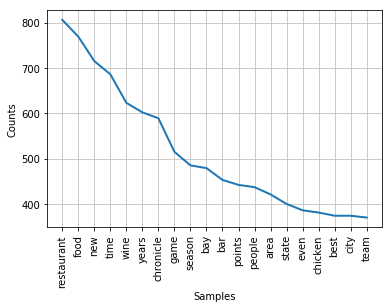

In [20]:
wf_tt.plot(20)

#### *Topics Discussion:

**To look through the topics recently covered in Chronicle, we combine the three categorical articles together and sort out the keywords inside the text. By checking the above frequency words, we found that the most popular five words are "restaurant", "food", "wine", "game" and "season". Thus, combining the other words in freqeuncy plot, we might predict the overall heated topics recently in Chronicle would be about "best resturant", "best food", "game seasons", "wines and bars" and "game point".**


### 1.4.2 Recent Topics under Single Category in Chronicle:

In [75]:
# Download the commmon stopwords which help sorting the topics.
stopwords=corpus.stopwords.words('english')

# --Bussiness and Technology--
addwords=["said","e","like","also","pg","would","could",
          "san","francisco","last","one","two"]
biz_voc=stopwords+addwords
biz_text="".join(df_biz.text)
biz_text=biz_text.lower()
words=nltk.word_tokenize(biz_text)
words=[w.lower() for w in words if w not in biz_voc and w.isalnum()]
wf_biz=nltk.FreqDist(words)


# --Food--
addwords=["one","two","1", "san","francisco","also", "two","says",
          "make","get","years","still","first","made","said",
          "could","2","would","many","much","back","415"]
fd_voc=stopwords+addwords
fd_text="".join(df_fd.text)
fd_text=fd_text.lower()
words=nltk.word_tokenize(fd_text)
words=[w.lower() for w in words if w not in fd_voc and w.isalnum()]
wf_fd=nltk.FreqDist(words)


# --Sports--
addwords=["said", "first", "one", "two", "san", "francisco", "year", 
          "get",  "last", "would", "could","years","three", "like", 
          "think", "going", "play", "back", "also"]
spt_voc=stopwords+addwords
spt_text="".join(df_spt.text)
spt_text=spt_text.lower()
words=nltk.word_tokenize(spt_text)
words=[w.lower() for w in words if w not in spt_voc and w.isalnum()]
wf_spt=nltk.FreqDist(words)

### 1.4.2 Data Visualization

#### 1. Biz_Tech Article Plot

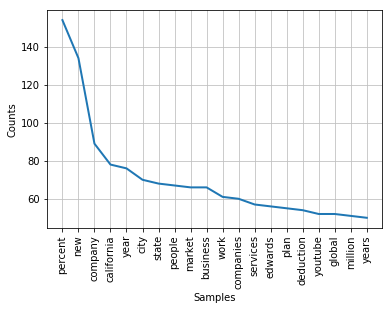

In [76]:
wf_biz.plot(20)

#### 2. Food Article Plot

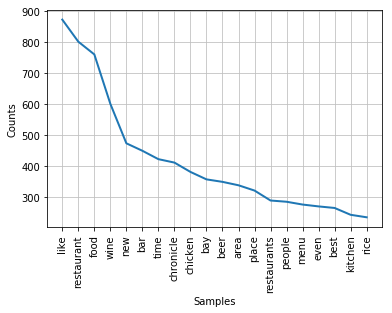

In [77]:
wf_fd.plot(20)

#### 3. Sport Article Plot

In [2]:
wf_spt.plot(20)

NameError: name 'wf_spt' is not defined

#### *Topics Discussion:

**Now, we look through the topics inside one single category and check how the different from the overall topics.**

**1.Biz_Tech:** By checking the frequency plot in business category, we found that the most popular words are: **"new companies", "market", "service", "business and work","plan" and "Million".** Thus, combining those frequently-appeared words in the list, we might predict the heated topics under Biz_tech category would be **"Company and people", "service and market", "Investment", "Youtube Company" and "global business".**


**2.Food:** By checking the frequency plot in food category, we found that the most popular words are: **"restaurant", "wine and bars", "menu", "kithcen" and "chicken".** Thus, combining those frequently-appeared words in the list,  we might predict the heated topics under food category would be **"Best restaurant", "wine bars", "food type" and "best menus and kitchens".**


**3.Sports:** By checking the frequency plot in sports category, we found that the most five popular words are: **"game/games", "points", "season", "football" and "NFL".** Thus, combining those frequently-appeared words in the list,  we might predict the heated topics under sports category would be **"NFL games", "football games", "players and coachs" and "Raiders".**


***Summary:**


**We can find that the overall topics we predicted might be a general summary of three categories of articles. However, when look inside the one single category, we would find out more specific topics. For example, we find the biz_tech category contain more professional topics about "globlal business" and "investment"; Inside food category, we have professional topics like "menus" and "kitchens"; Inside sports category, we discover interesting topics lke "NFL" and "football mactches".In this way, we may conclude that when readers choose to select a specific category of articles, they would reach more professional and related articles as result.**